In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
dataset=pd.read_csv('/content/sample_data/Car performance data.csv')
dataset

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino
...,...,...,...,...,...,...,...,...,...
401,34.0,4,108.0,70.0,2245,16.9,82,Japanese,toyota corolla
402,38.0,4,91.0,67.0,1965,15.0,82,Japanese,honda civic
403,32.0,4,91.0,67.0,1965,15.7,82,Japanese,honda civic (auto)
404,38.0,4,91.0,67.0,1995,16.2,82,Japanese,datsun 310 gx


Missing values finding

In [ ]:
dataset.isnull().any()

mpg              True
cylinders       False
engine          False
horsepower       True
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

No null characters in the columns but there is a special character '?' in the 'horsepower' column. So we we replaced '?' with nan and replaced nan values with mean of the column.

In [ ]:
dataset['horsepower']=dataset['horsepower'].replace('?',np.nan)

Handling missing data

In [ ]:
dataset['horsepower'].isnull().sum()

6

In [ ]:
dataset['horsepower']=dataset['horsepower'].astype('float64')

In [ ]:
dataset['horsepower'].fillna((dataset['horsepower'].mean()),inplace=True)

In [ ]:
dataset.isnull().any()

mpg              True
cylinders       False
engine          False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

In [ ]:
dataset['mpg'].fillna((dataset['mpg'].mean()),inplace=True)

In [ ]:
dataset.isnull().any()

mpg             False
cylinders       False
engine          False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

In [ ]:
dataset.info() #Pandas dataframe.info() function is used to get a quick overview of the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           406 non-null    float64
 1   cylinders     406 non-null    int64  
 2   engine        406 non-null    float64
 3   horsepower    406 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   year          406 non-null    int64  
 7   origin        406 non-null    object 
 8   name          406 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.7+ KB


In [ ]:
dataset.describe() #Pandas describe() is used to view some basic statistical details of a data frame or a series of numeric values.

,mpg,cylinders,engine,horsepower,weight,acceleration,year
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182
std,7.738404,1.712160,104.922458,38.480531,847.004328,2.803359,3.748737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,105.000000,76.000000,2226.500000,13.700000,73.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
#corr_table=dataset.corr()#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
#corr_table
def correlation_matrix(dataset: pd.DataFrame):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = dataset.corr()
    
    # Create cmap
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

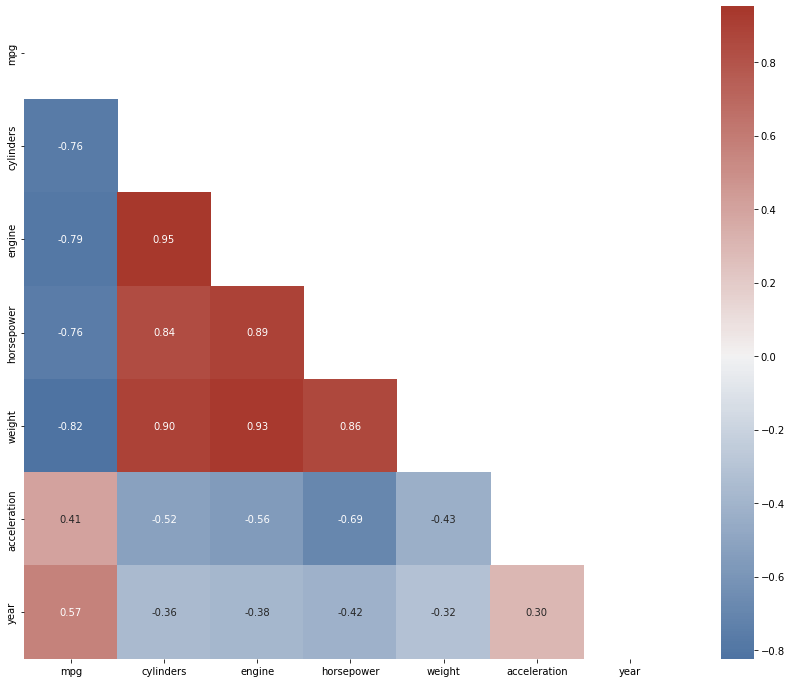

In [ ]:
correlation_matrix(dataset)

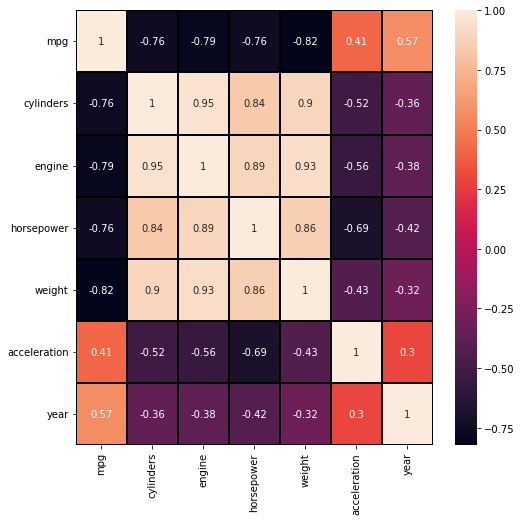

In [ ]:
sns.heatmap(dataset.corr(),annot=True,linecolor ='black', linewidths = 1)#Heatmap is a way to show some sort of matrix plot,annot is used for correlation.
fig=plt.gcf()
fig.set_size_inches(8,8)

Visualizations of each attributes w.r.t rest of all attributes

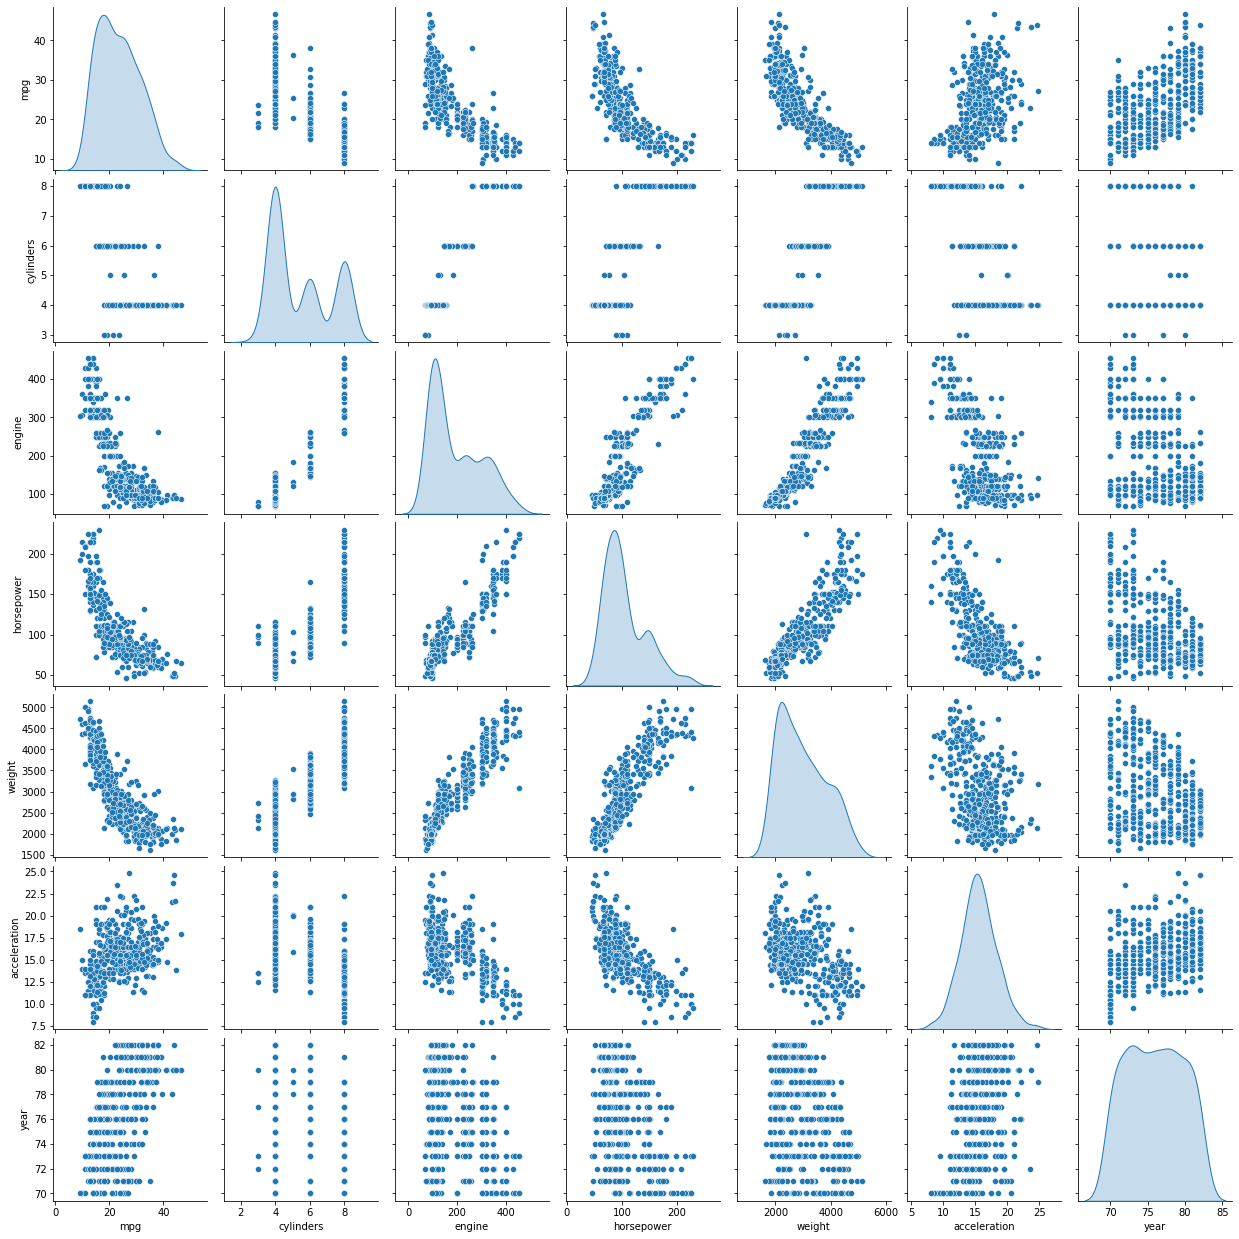

In [ ]:
sns.pairplot(dataset,diag_kind='kde') #pairplot represents pairwise relation across the entire dataframe.
plt.show()

Regression plots(regplot()) creates a regression line between 2 parameters and helps to visualize their linear relationships.



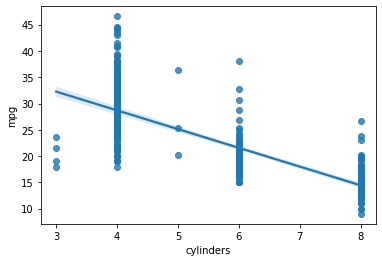

In [ ]:
sns.regplot(x="cylinders", y="mpg", data=dataset)

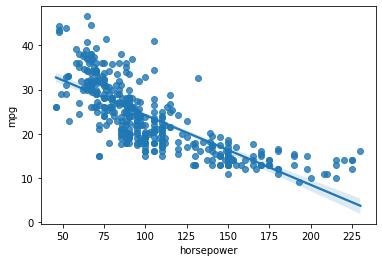

In [ ]:
sns.regplot(x="horsepower", y="mpg", data=dataset)

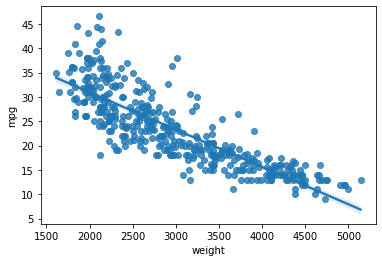

In [ ]:
sns.regplot(x="weight", y="mpg", data=dataset)

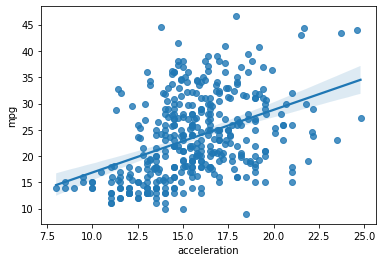

In [ ]:
sns.regplot(x="acceleration", y="mpg", data=dataset)

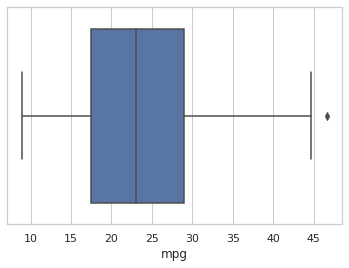

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["mpg"])

Finding quartiles for mgp

The P-value is the probability value that the correlation between these two variables is statistically significant.
Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is < 0.001: we say there is strong evidence that the correlation is significant.
the p-value is < 0.05: there is moderate evidence that the correlation is significant.
the p-value is > 0.1: there is weak evidence that the correlation is significant.
the p-value is > 0.1: there is no evidence that the correlation is significant.

In [ ]:
from scipy import stats

**Cylinders vs mpg**
Let's calculate the Pearson Correlation Coefficient and P-value of 'Cylinders' and 'mpg'.



In [ ]:
pearson_coef, p_value = stats.pearsonr(dataset['cylinders'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7626979902421125  with a P-value of P = 1.7955024088166485e-78


The relationship is negative and moderately strong.

Horsepower vs mpg

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataset['horsepower'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7580589295332026  with a P-value of P = 5.2976194337135e-77


The p-value is < 0.001, the correlation between horsepower and mpg is statistically significant, and the coefficient of ~ -0.771 hence relationship is negative and moderately strong.

Weight vs mpg

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataset['weight'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.8233271954182653  with a P-value of P = 2.0199123223561256e-101


The linear negative relationship is quite strong since coefficient is 
0.8

Acceleration vs mpg

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataset['acceleration'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.4093381866887994  with a P-value of P = 7.812099402391106e-18


 The linear relationship is weak (~0.420).

Seperating Dependant And Independant Variables.

In [ ]:
dataset

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino
...,...,...,...,...,...,...,...,...,...
401,34.0,4,108.0,70.0,2245,16.9,82,Japanese,toyota corolla
402,38.0,4,91.0,67.0,1965,15.0,82,Japanese,honda civic
403,32.0,4,91.0,67.0,1965,15.7,82,Japanese,honda civic (auto)
404,38.0,4,91.0,67.0,1995,16.2,82,Japanese,datsun 310 gx


In [ ]:
x=dataset[['cylinders','horsepower','weight','engine']].values
x

array([[   8.,  130., 3504.,  307.],
       [   8.,  165., 3693.,  350.],
       [   8.,  150., 3436.,  318.],
       ...,
       [   4.,   67., 1965.,   91.],
       [   4.,   67., 1995.,   91.],
       [   4.,   96., 2665.,  144.]])

In [ ]:
y=dataset.iloc[:,0:1].values
y#dependant variables
#mpg

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [15. ],
       [14. ],
       [ nan],
       [15. ],
       [14. ],
       [22. ],
       [18. ],
       [21. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [28. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [26. ],
       [25. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17. ],
       [11. ],
       [13. ],
       [12. ],
       [13. ],
       [15. ],
       [13. ],
       [13. ],
       [14. ],
       [22. ],
       [28. ],
       [13. ],
       [14

Splitting into train and test data.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)
#splitting as 90% train data and 10% test data

decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0,criterion="mae")
dt.fit(x_train,y_train)


ValueError: ignored

In [ ]:
y_pred=dt.predict(x_test)
y_pred

array([19.8       , 24.5       , 17.5       , 23.        , 14.        ,
       34.3       , 26.4       , 27.2       , 20.3       , 18.6       ,
       23.        , 24.        , 24.2       , 25.        , 14.        ,
       19.        , 14.        , 18.        , 28.        , 13.        ,
       25.        , 43.1       , 15.        , 18.6       , 18.6       ,
       29.        , 32.        , 21.        , 18.        , 37.2       ,
       44.        , 27.5       , 17.        , 11.        , 14.        ,
       23.51457286, 20.        , 36.4       , 25.5       , 14.        ,
       26.        ])

In [ ]:
y_test

array([[20.2       ],
       [27.        ],
       [13.        ],
       [26.6       ],
       [14.5       ],
       [30.5       ],
       [24.        ],
       [29.        ],
       [22.        ],
       [18.        ],
       [24.        ],
       [25.        ],
       [20.        ],
       [27.        ],
       [23.51457286],
       [22.        ],
       [13.        ],
       [20.6       ],
       [35.        ],
       [15.        ],
       [27.        ],
       [29.        ],
       [18.        ],
       [20.        ],
       [19.        ],
       [30.        ],
       [31.        ],
       [19.        ],
       [14.        ],
       [31.8       ],
       [24.5       ],
       [21.1       ],
       [17.5       ],
       [13.        ],
       [14.        ],
       [13.        ],
       [23.51457286],
       [30.        ],
       [25.1       ],
       [17.        ],
       [32.2       ]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


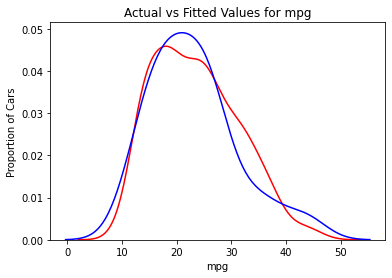

In [ ]:
ax1 = sns.distplot(dataset['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')
 
plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

Mean Squared Error (MSE)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.2520411945246369

In [ ]:
mean_squared_error(y_test,y_pred)

28.10989174946925

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.301876248034204

random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=10,random_state=0,criterion='mse')
rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', n_estimators=10, random_state=0)

In [ ]:
y_pred2=rf.predict(x_test)
y_pred2

array([20.44      , 26.83      , 15.25      , 19.33      , 14.4       ,
       30.45      , 24.29      , 26.38      , 21.40145729, 17.96      ,
       25.48      , 24.15      , 22.27      , 26.5       , 15.1       ,
       19.2       , 19.05728643, 20.98      , 24.95      , 13.8       ,
       26.5       , 34.59291457, 15.94      , 18.01      , 18.39      ,
       29.39      , 35.55      , 22.17      , 15.69      , 35.2       ,
       33.04      , 25.6       , 15.1       , 11.9       , 14.1       ,
       21.81165829, 20.69      , 29.87      , 25.53      , 13.5       ,
       30.07      ])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


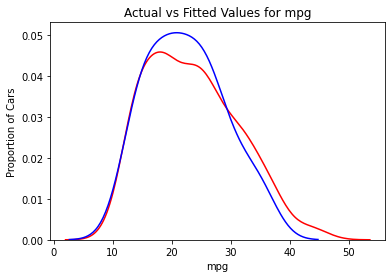

In [ ]:
ax1 = sns.distplot(dataset['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred2)

0.6236009508092386

In [ ]:
mean_squared_error(y_test,y_pred2)

14.145881363922205

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred2))

3.761101083980887

linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred3=mr.predict(x_test)
y_pred3 

array([[24.14459634],
       [25.76005997],
       [15.64069765],
       [18.19056595],
       [14.05939765],
       [29.50151755],
       [25.04417204],
       [27.21189505],
       [24.97061229],
       [19.7750551 ],
       [26.817886  ],
       [28.68640443],
       [24.21454293],
       [29.54182952],
       [13.45222781],
       [22.04617564],
       [14.02990868],
       [21.03919965],
       [27.31587911],
       [15.01549168],
       [29.54182952],
       [32.3456142 ],
       [20.63128407],
       [19.71019128],
       [19.82754935],
       [30.31603352],
       [32.37995083],
       [23.02540708],
       [17.27963244],
       [30.91099712],
       [30.1714837 ],
       [26.9496119 ],
       [15.37667974],
       [ 8.73167015],
       [14.99226729],
       [15.52580919],
       [23.15257124],
       [23.59212834],
       [25.97250026],
       [17.45038183],
       [29.10126689]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


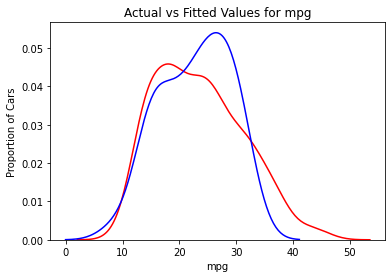

In [ ]:
ax1 = sns.distplot(dataset['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred3)

0.6606566899472943

In [ ]:
mean_squared_error(y_test,y_pred3)

12.753247427076836

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred3))

3.571168916066116

The model with the higher R-squared value , smallest MSE value is a better fit for the data.
Comparing these three models, we conclude that the DecisionTree model is the best model to be able to predict mpg from our dataset.